In [1]:
import pandas as pd

df = pd.read_csv('../renttherunway_data.csv')

df.head()

,fit,user_id,bust size,item_id,weight,rating,rented for,review_text,body type,review_summary,category,height,size,age,review_date
0,fit,420272,34d,2260466,137lbs,10.0,vacation,An adorable romper! Belt and zipper were a lit...,hourglass,So many compliments!,romper,"5' 8""",14,28.0,"April 20, 2016"
1,fit,273551,34b,153475,132lbs,10.0,other,I rented this dress for a photo shoot. The the...,straight & narrow,I felt so glamourous!!!,gown,"5' 6""",12,36.0,"June 18, 2013"
2,fit,360448,NaN,1063761,NaN,10.0,party,This hugged in all the right places! It was a ...,NaN,It was a great time to celebrate the (almost) ...,sheath,"5' 4""",4,116.0,"December 14, 2015"
3,fit,909926,34c,126335,135lbs,8.0,formal affair,I rented this for my company's black tie award...,pear,Dress arrived on time and in perfect condition.,dress,"5' 5""",8,34.0,"February 12, 2014"
4,fit,151944,34b,616682,145lbs,10.0,wedding,I have always been petite in my upper body and...,athletic,Was in love with this dress !!!,gown,"5' 9""",12,27.0,"September 26, 2016"


In [2]:
#컬럼 정보 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 15 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   fit             192544 non-null  object 
 1   user_id         192544 non-null  int64  
 2   bust size       174133 non-null  object 
 3   item_id         192544 non-null  int64  
 4   weight          162562 non-null  object 
 5   rating          192462 non-null  float64
 6   rented for      192534 non-null  object 
 7   review_text     192476 non-null  object 
 8   body type       177907 non-null  object 
 9   review_summary  192197 non-null  object 
 10  category        192544 non-null  object 
 11  height          191867 non-null  object 
 12  size            192544 non-null  int64  
 13  age             191584 non-null  float64
 14  review_date     192544 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 22.0+ MB


In [3]:
# 삭제할 컬럼 리스트
cols_to_drop = [
    "review_text", "review_summary", "rented for", "review_date"
]

# 삭제 수행
df = df.drop(columns=cols_to_drop)

# 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   fit        192544 non-null  object 
 1   user_id    192544 non-null  int64  
 2   bust size  174133 non-null  object 
 3   item_id    192544 non-null  int64  
 4   weight     162562 non-null  object 
 5   rating     192462 non-null  float64
 6   body type  177907 non-null  object 
 7   category   192544 non-null  object 
 8   height     191867 non-null  object 
 9   size       192544 non-null  int64  
 10  age        191584 non-null  float64
dtypes: float64(2), int64(3), object(6)
memory usage: 16.2+ MB


수치형 데이터 확인

In [4]:
df.describe()

,user_id,item_id,rating,size,age
count,192544.000000,1.925440e+05,192462.000000,192544.000000,191584.000000
mean,499494.100149,1.045684e+06,9.092371,12.245175,33.871017
std,289059.719328,8.053148e+05,1.430044,8.494877,8.058083
min,9.000000,1.233730e+05,2.000000,0.000000,0.000000
25%,250654.250000,1.950760e+05,8.000000,8.000000,29.000000
50%,499419.000000,9.483960e+05,10.000000,12.000000,32.000000
75%,750974.000000,1.678888e+06,10.000000,16.000000,37.000000
max,999997.000000,2.966087e+06,10.000000,58.000000,117.000000


결측값 정보 출력, 처리


weight 29,982


bust size 18,411


body type 14,637 

In [5]:
# 각 열별 결측값 개수 확인
print("결측값 개수:")
print(df.isnull().sum())

결측값 개수:
fit              0
user_id          0
bust size    18411
item_id          0
weight       29982
rating          82
body type    14637
category         0
height         677
size             0
age            960
dtype: int64


In [6]:
# 결측값이 있는 행의 비율 확인
print("\n결측값이 있는 행의 비율:")
print((df.isnull().sum() / len(df)) * 100)


결측값이 있는 행의 비율:
fit           0.000000
user_id       0.000000
bust size     9.561970
item_id       0.000000
weight       15.571506
rating        0.042588
body type     7.601899
category      0.000000
height        0.351608
size          0.000000
age           0.498587
dtype: float64


Rating 정보 출력

In [7]:
#평점 값들 출력력
print("평점 고유값:",df['rating'].unique)

#평점 빈도수 출력
rating_counts = df['rating'].value_counts()
print("\n평점별 빈도수:")
print(rating_counts)

평점 고유값: <bound method Series.unique of 0         10.0
1         10.0
2         10.0
3          8.0
4         10.0
          ... 
192539    10.0
192540    10.0
192541     6.0
192542    10.0
192543    10.0
Name: rating, Length: 192544, dtype: float64>

평점별 빈도수:
rating
10.0    124537
8.0      53391
6.0      10697
4.0       2791
2.0       1046
Name: count, dtype: int64


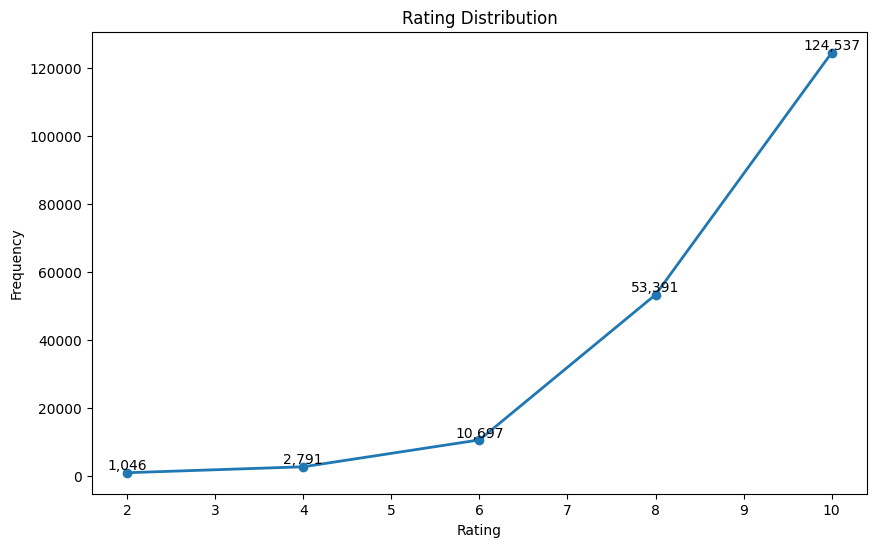

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#그래프 크기기
plt.figure(figsize=(10, 6))

# 평점별 빈도수를 계산
rating_counts = df['rating'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(rating_counts.index, rating_counts.values, marker='o', linewidth=2)

# 그래프 제목과 축 레이블 설정
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# x축 눈금 설정
plt.xticks(range(2, 11))  # 2부터 10까지의 정수로 눈금 표시

# 각 점 위에 숫자 표시
for x, y in zip(rating_counts.index, rating_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

평점 변환 (1~5점)

In [9]:
# 10점을 5점으로 변환하는 함수
def convert_rating(rating):
    return round((rating - 1) * (4/9) + 1, 1)  # 1-10점을 1-5점으로 변환

# 변환 적용
df['rating_5'] = df['rating'].apply(convert_rating)

# 결과 확인
print("변환된 평점 분포:")
print(df['rating_5'].value_counts().sort_index())

변환된 평점 분포:
rating_5
1.4      1046
2.3      2791
3.2     10697
4.1     53391
5.0    124537
Name: count, dtype: int64


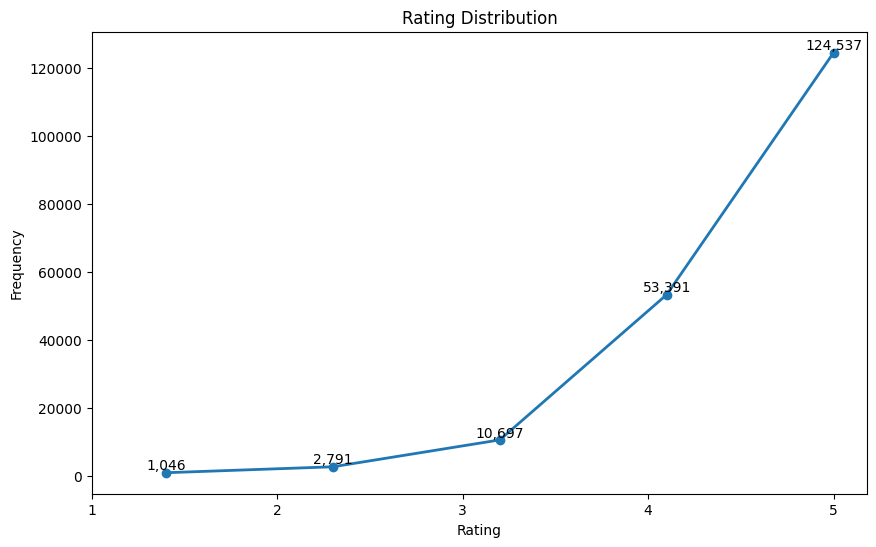

In [10]:
plt.figure(figsize=(10, 6))

# 평점별 빈도수를 계산
rating5_counts = df['rating_5'].value_counts().sort_index()

# 선 그래프 그리기
plt.plot(rating5_counts.index, rating5_counts.values, marker='o', linewidth=2)

# 그래프 제목과 축 레이블 설정
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')

# x축 눈금 설정
plt.xticks(range(1, 6))  # 2부터 10까지의 정수로 눈금 표시

# 각 점 위에 숫자 표시
for x, y in zip(rating5_counts.index, rating5_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

Fit 정보 출력

In [11]:
# fit 열의 고유값 확인
print("fit 열의 고유값:", df['fit'].unique())

# fit 열의 빈도수 확인
fit_counts = df['fit'].value_counts()
print("\nfit 열의 빈도수:")
print(fit_counts)

fit 열의 고유값: ['fit' 'small' 'large']

fit 열의 빈도수:
fit
fit      142058
small     25779
large     24707
Name: count, dtype: int64


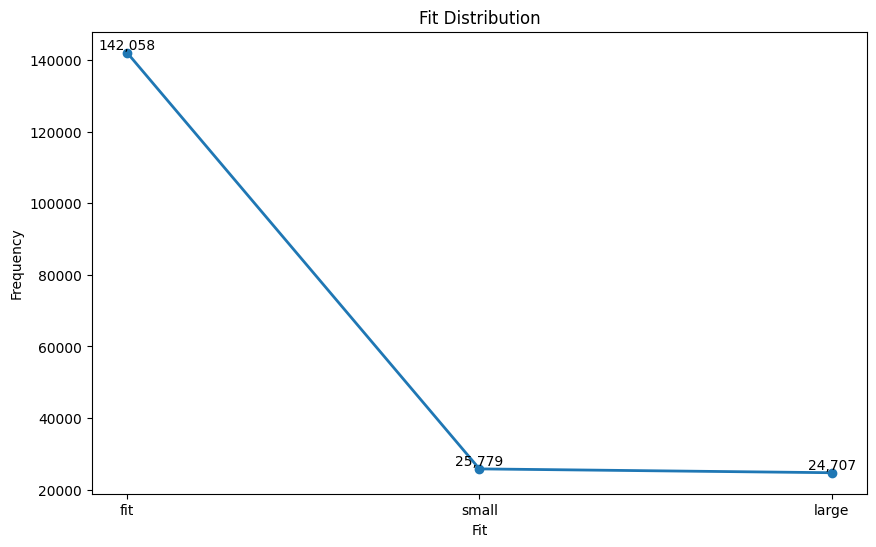

In [12]:
#원핫인코딩 전 fit 열 표 출력
plt.figure(figsize=(10, 6))

fit_counts = df['fit'].value_counts()

plt.plot(fit_counts.index, fit_counts.values, marker='o', linewidth=2)
plt.title('Fit Distribution')
plt.xlabel('Fit')
plt.ylabel('Frequency')

for x, y in zip(fit_counts.index, fit_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()


In [13]:
#범주형 데이터 처리, fit 열 원핫인코딩
fit_one_hot = pd.get_dummies(df['fit'], prefix='fit')
df = pd.concat([df, fit_one_hot], axis=1)

#fit 열 삭제
df = df.drop('fit', axis=1)

In [14]:
# One-hot 인코딩된 컬럼들의 합계 확인
print(df.filter(like='fit_').sum())

fit_fit      142058
fit_large     24707
fit_small     25779
dtype: int64


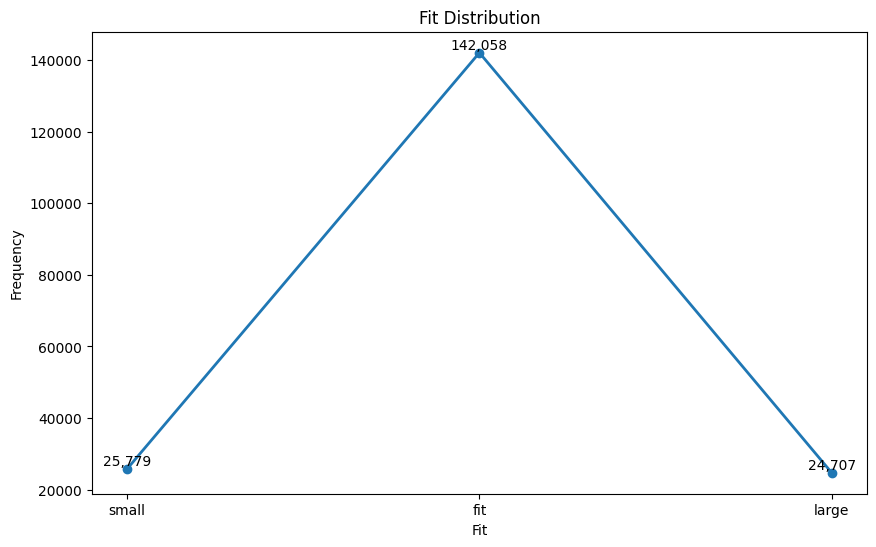

In [15]:
#원핫인코딩 후 표 다시 출력

# 1. 원핫 컬럼 리스트
fit_columns = ['fit_small', 'fit_fit', 'fit_large']

# 2. 각 카테고리별 합계를 구함 (value_counts와 같은 역할)
fit_counts = df[fit_columns].sum()

# 3. 시각화
plt.figure(figsize=(10,6))
plt.plot(fit_counts.index.str.replace('fit_', ''),  # 보기 좋게 이름 정리
         fit_counts.values, marker='o', linewidth=2)

plt.title('Fit Distribution')
plt.xlabel('Fit')
plt.ylabel('Frequency')

for x, y in zip(fit_counts.index.str.replace('fit_', ''), fit_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

Bust Size 정보 출력

In [16]:
print("bust size 고유값:\n",df['bust size'].unique())


print("\nbust size 빈도수:\n",df['bust size'].value_counts())

bust size 고유값:
 ['34d' '34b' nan '34c' '32b' '34d+' '36d' '36a' '32d+' '36c' '32c' '32dd'
 '30dd' '32d' '36b' '34a' '34dd' '40ddd/e' '32a' '38d+' '38c' '34ddd/e'
 '38a' '38b' '38d' '36ddd/e' '38dd' '38f' '42dd' '36dd' '40g' '40dd' '28f'
 '30ddd/e' '32ddd/e' '28b' '36d+' '40d' '28dd' '34f' '42c' '30d' '30b'
 '42d' '34aa' '32aa' '36f' '28c' '40b' '36aa' '34g' '32f' '42ddd/e' '40c'
 '28g' '28aa' '36g' '30a' '44ddd/e' '30c' '30aa' '44dd' '32i' '32g' '30g'
 '38h' '30h' '34j' '38ddd/e' '32h' '28a' '44d' '40h' '38g' '34h' '36j'
 '40f' '36h' '28ddd/e' '44f' '34i' '30f' '36i' '30i' '28h' '42b' '42j'
 '32j' '46c' '48d' '38aa' '38i' '48dd' '28d' '28i' '46ddd/e' '42g' '44c'
 '42f' '40j' '38j' '46f' '44b' '44g' '42h' '40i' '44h']

bust size 빈도수:
 bust size
34b    27285
34c    23139
34d    18029
36c    13516
32d    11196
       ...  
28h        1
46f        1
42j        1
28i        1
44h        1
Name: count, Length: 106, dtype: int64


In [17]:
# 'ddd/e'가 포함된 값들만 필터링
ddd_values = df[df['bust size'].str.contains('ddd/e', na=False)]['bust size']

# 고유값과 개수 출력
print("ddd/e가 포함된 값들:")
print(ddd_values.value_counts())

# 총 개수 출력
print(f"\nddd/e가 포함된 값의 총 개수: {len(ddd_values)}")

ddd/e가 포함된 값들:
bust size
34ddd/e    1030
32ddd/e     726
36ddd/e     445
38ddd/e     190
30ddd/e     108
40ddd/e      47
42ddd/e      30
28ddd/e      12
44ddd/e      11
46ddd/e       3
Name: count, dtype: int64

ddd/e가 포함된 값의 총 개수: 2602


weight 정보 출력

In [18]:

print("weight 고유값:\n",df['weight'].unique())

weight 고유값:
 ['137lbs' '132lbs' nan '135lbs' '145lbs' '138lbs' '112lbs' '118lbs'
 '114lbs' '120lbs' '142lbs' '140lbs' '170lbs' '143lbs' '115lbs' '123lbs'
 '122lbs' '165lbs' '130lbs' '155lbs' '105lbs' '190lbs' '150lbs' '136lbs'
 '128lbs' '174lbs' '125lbs' '110lbs' '160lbs' '180lbs' '175lbs' '134lbs'
 '109lbs' '124lbs' '250lbs' '195lbs' '231lbs' '161lbs' '126lbs' '210lbs'
 '215lbs' '220lbs' '163lbs' '106lbs' '178lbs' '157lbs' '185lbs' '108lbs'
 '200lbs' '92lbs' '117lbs' '146lbs' '116lbs' '141lbs' '103lbs' '121lbs'
 '127lbs' '111lbs' '152lbs' '172lbs' '107lbs' '133lbs' '248lbs' '154lbs'
 '153lbs' '131lbs' '156lbs' '129lbs' '186lbs' '100lbs' '113lbs' '148lbs'
 '119lbs' '166lbs' '144lbs' '158lbs' '95lbs' '234lbs' '139lbs' '230lbs'
 '184lbs' '102lbs' '205lbs' '168lbs' '162lbs' '147lbs' '98lbs' '225lbs'
 '204lbs' '89lbs' '159lbs' '96lbs' '176lbs' '212lbs' '149lbs' '240lbs'
 '198lbs' '169lbs' '260lbs' '196lbs' '104lbs' '173lbs' '179lbs' '101lbs'
 '239lbs' '182lbs' '151lbs' '164lbs' '218lbs' '1

In [19]:
print("\nweight 빈도수:\n",df['weight'].value_counts())


weight 빈도수:
 weight
130lbs    14370
135lbs    13705
125lbs    12869
140lbs    12162
120lbs    10687
          ...  
249lbs        1
261lbs        1
273lbs        1
70lbs         1
251lbs        1
Name: count, Length: 190, dtype: int64


In [20]:
#weight 열 데이터 파운드->kg 변환
df['weight_kg'] = (df['weight'].astype(str).str.replace('lbs', '', regex=False).astype(float).mul(0.45).round(1))

#weight_kg 열 데이터 확인
print("\nweight_kg 고유값:\n",df['weight_kg'].unique())
print("\nweight_kg 빈도수:\n",df['weight_kg'].value_counts())

#weight 열= weight_kg 열, weight_kg 컬럼럼 삭제
df['weight']=df['weight_kg']
df=df.drop('weight_kg',axis=1)


weight_kg 고유값:
 [ 61.6  59.4   nan  60.8  65.2  62.1  50.4  53.1  51.3  54.   63.9  63.
  76.5  64.4  51.8  55.4  54.9  74.2  58.5  69.8  47.2  85.5  67.5  61.2
  57.6  78.3  56.2  49.5  72.   81.   78.8  60.3  49.1  55.8 112.5  87.8
 104.   72.4  56.7  94.5  96.8  99.   73.4  47.7  80.1  70.6  83.2  48.6
  90.   41.4  52.6  65.7  52.2  63.4  46.4  54.4  57.2  50.   68.4  77.4
  48.2  59.8 111.6  69.3  68.9  59.   70.2  58.   83.7  45.   50.8  66.6
  53.6  74.7  64.8  71.1  42.8 105.3  62.6 103.5  82.8  45.9  92.2  75.6
  72.9  66.2  44.1 101.2  91.8  40.1  71.6  43.2  79.2  95.4  67.  108.
  89.1  76.  117.   88.2  46.8  77.9  80.6  45.4 107.6  81.9  68.   73.8
  98.1  77.  114.8  43.6 121.5  84.2  40.5  89.6 105.8  86.9  86.4  85.
  90.4 110.2  86.   92.7  97.2  75.2  84.6  91.4  94.  100.8  79.6 119.2
 124.2  98.6  44.6  95.   87.3 126.   93.2  93.6 128.2  88.6 130.5  39.2
 107.1  41.8  96.3 102.2  22.5  97.6  42.3  31.5  39.6  82.4 135.  122.8
  81.4 117.4 110.7 112.   90.9 108.4 

In [21]:
#weight 열 데이터 확인
print(df['weight'].value_counts())

print("\nweight 고유값:\n",df['weight'].unique())
print("\nweight 빈도수:\n",df['weight'].value_counts())

weight
58.5     14370
60.8     13705
56.2     12869
63.0     12162
54.0     10687
         ...  
112.0        1
117.4        1
122.8        1
31.5         1
113.0        1
Name: count, Length: 190, dtype: int64

weight 고유값:
 [ 61.6  59.4   nan  60.8  65.2  62.1  50.4  53.1  51.3  54.   63.9  63.
  76.5  64.4  51.8  55.4  54.9  74.2  58.5  69.8  47.2  85.5  67.5  61.2
  57.6  78.3  56.2  49.5  72.   81.   78.8  60.3  49.1  55.8 112.5  87.8
 104.   72.4  56.7  94.5  96.8  99.   73.4  47.7  80.1  70.6  83.2  48.6
  90.   41.4  52.6  65.7  52.2  63.4  46.4  54.4  57.2  50.   68.4  77.4
  48.2  59.8 111.6  69.3  68.9  59.   70.2  58.   83.7  45.   50.8  66.6
  53.6  74.7  64.8  71.1  42.8 105.3  62.6 103.5  82.8  45.9  92.2  75.6
  72.9  66.2  44.1 101.2  91.8  40.1  71.6  43.2  79.2  95.4  67.  108.
  89.1  76.  117.   88.2  46.8  77.9  80.6  45.4 107.6  81.9  68.   73.8
  98.1  77.  114.8  43.6 121.5  84.2  40.5  89.6 105.8  86.9  86.4  85.
  90.4 110.2  86.   92.7  97.2  75.2  84.6  91.4

size와 상관계수가 높아 size의 평균으로 weight 결측값 채움.

In [22]:
# size별 평균 weight 계산
mean_weights_by_size = df.dropna(subset=['weight']).groupby('size')['weight'].mean()

# weight가 결측이고, size는 결측이 아닌 경우에만 해당 size 평균으로 채우기
df.loc[df['weight'].isnull() & df['size'].notnull(), 'weight'] = (
    df.loc[df['weight'].isnull() & df['size'].notnull(), 'size']
    .map(mean_weights_by_size)
)

# IQR 기반 weight 이상치 제거
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['weight'] >= lower_bound) & (df['weight'] <= upper_bound)]
# 결과 확인
print("남은 weight 결측값 수:", df['weight'].isnull().sum())

남은 weight 결측값 수: 0


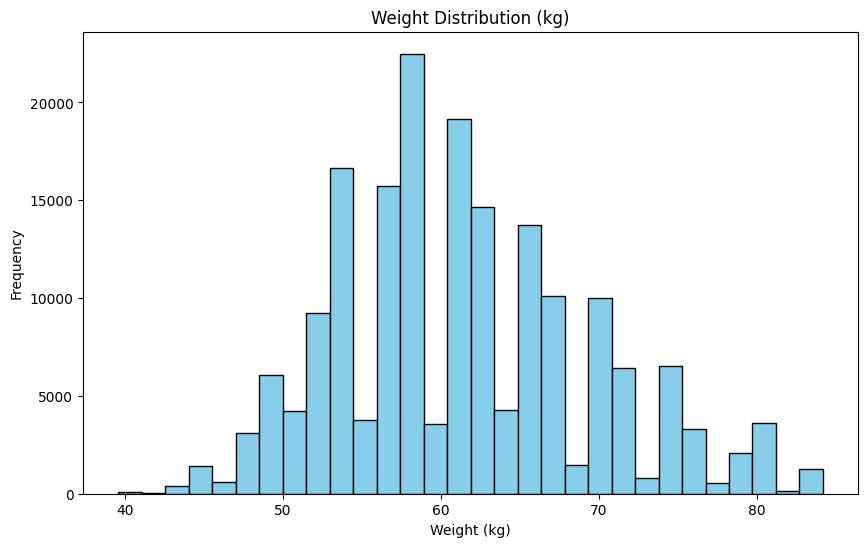

In [23]:
#weight 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['weight'] != 0]['weight'], bins=30, color='skyblue', edgecolor='black')
plt.title('Weight Distribution (kg)')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')
plt.show()

height 정보 출력

In [24]:
df['height'].unique()

array(['5\' 8"', '5\' 6"', '5\' 4"', '5\' 5"', '5\' 9"', '5\' 3"',
       '5\' 2"', '5\' 7"', '5\' 1"', '5\' 10"', '6\' 0"', '4\' 10"',
       '6\' 1"', '5\' 11"', '5\' 0"', nan, '4\' 11"', '4\' 8"', '6\' 2"',
       '6\' 3"', '4\' 9"', '4\' 6"', '4\' 7"', '6\' 4"', '6\' 6"'],
      dtype=object)

In [25]:
import re
import numpy as np

# 변환 함수 정의
def ft_inch_to_cm(h):
    if pd.isnull(h):
        return np.nan
    match = re.match(r"(\d+)'[\s]*(\d+)", str(h))
    if match:
        feet = int(match.group(1))
        inches = int(match.group(2))
        return round((feet * 12 + inches) * 2.54, 1)
    return np.nan

# 1. 변환 (결측 유지)
df['cm'] = df['height'].apply(ft_inch_to_cm)

# 평균값 계산하고 소수점 첫째 자리까지 반올림
mean_cm = round(df['cm'].mean(), 1)

# 결측치 채우기
df['cm'] = df['cm'].fillna(mean_cm)

In [380]:
df['height'] = df['cm']

# IQR 기반 height 이상치 제거
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['height'] >= lower_bound) & (df['height'] <= upper_bound)]

df['height'].unique()

array([172.7, 167.6, 162.6, 165.1, 175.3, 160. , 157.5, 170.2, 154.9,
       177.8, 182.9, 147.3, 185.4, 180.3, 152.4, 165.8, 149.9, 144.8])

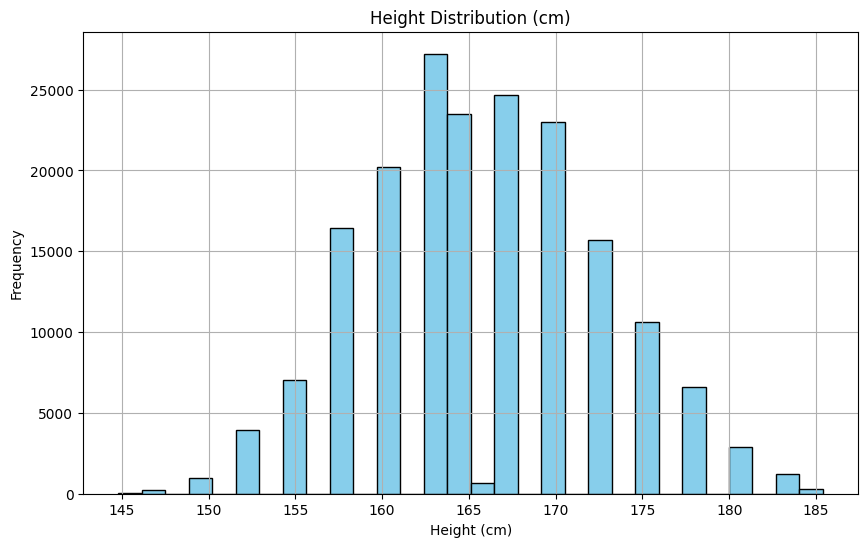

In [381]:
#height 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['height'] != 0]['height'], bins=30, color='skyblue', edgecolor='black')
plt.title('Height Distribution (cm)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

size 정보 출력

In [382]:
df['size'].unique()

array([14, 12,  4,  8, 21,  1, 20,  2, 17, 16, 28, 35, 24, 15,  5, 23,  9,
       13, 34,  7, 25, 26, 29, 11,  0, 32,  3, 39, 33, 27, 36, 43, 19, 45,
       10, 49, 57, 51, 42,  6, 46, 40, 37, 52, 22, 38, 41, 30, 18, 48],
      dtype=int64)

IQR(사분위 방식) 이용하여 이상치 탐지

Q1 : 하위 25%(1사분위)

Q3 : 상위 75%(3사분위)

IQR : 데이터 중간 범위

1.5	: 기본값, 일반적인 이상치 탐지에 적합

In [383]:
import numpy as np

# 1. IQR 계산
Q1 = df['size'].quantile(0.25)
Q3 = df['size'].quantile(0.75)
IQR = Q3 - Q1

# 2. 이상치 경계 정의
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 3. 이상치 찾기
outliers = df[(df['size'] < lower_bound) | (df['size'] > upper_bound)]

print(f"이상치 개수: {len(outliers)}")
print("이상치 값 목록:", sorted(df['size'].unique()[ (df['size'].unique() < lower_bound) | (df['size'].unique() > upper_bound) ]))

df = df[(df['size'] >= lower_bound) & (df['size'] <= upper_bound)]

print("size 총 개수: ", len(df['size']))

이상치 개수: 536
이상치 값 목록: [33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 45, 46, 48, 49, 51, 52, 57]
size 총 개수:  184679


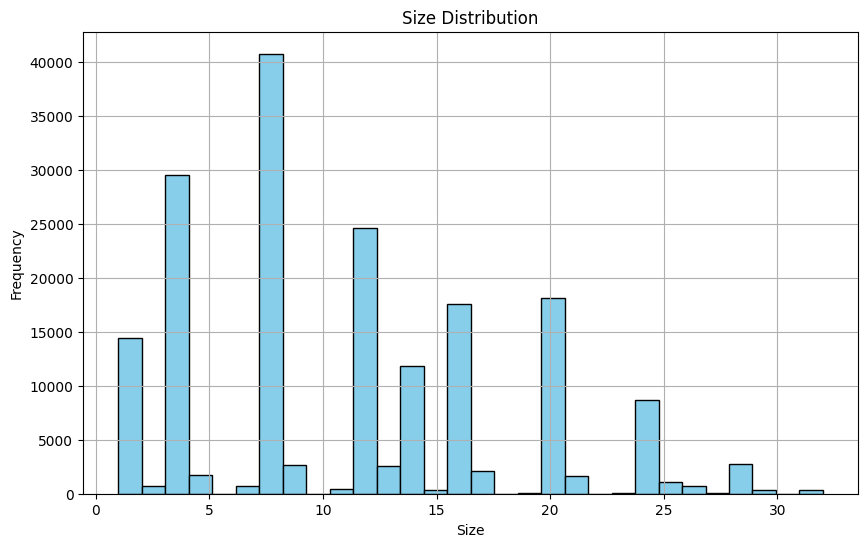

In [384]:
#Size 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['size'] != 0]['size'], bins=30, color='skyblue', edgecolor='black')
plt.title('Size Distribution')
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

age 정보 출력

In [385]:
print("전처리 전 나이 값 목록: ", df['age'].unique())

# 10 이상 100 이하 값들로 평균 계산, 소수점 첫째자리 까지 
age_mean = round(df['age'][(df['age'] >= 10) & (df['age'] <= 100)].mean(), 1)

# 결측치 채우기
df['age'] = df['age'].fillna(age_mean)

# 10 미만 또는 90 초과 값 제거
df = df[(df['age'] >= 10) & (df['age'] <= 90)]

print("전처리 후 나이 값 목록: ", df['age'].unique())

print("결측값 개수: ",df['age'].isnull().sum())


전처리 전 나이 값 목록:  [ 28.  36. 116.  34.  27.  45.  65.  33.  30.  26.  29.  32.  35.  21.
  20.  37.  50.  43.  47.  53.  31.  38.  40.  52.  24.  25.  nan  48.
  44.  39.  49.  22.  42.  69.  23.  17.  41.  56.  46.  54.  59.  51.
  58.  55.  57.  62.  19.  60.  61.  66.  15.  70.  16.   0.  64.  18.
  63.  87.  77.  68.  67.   3.  75.  91.  85. 117.   2.  73.  71.  92.
   9.  99.   1.  14. 106.   8.  72.   4. 100.   5.  74.  76. 113. 115.
  81.  78.  97.  88. 112.]
전처리 후 나이 값 목록:  [28.  36.  34.  27.  45.  65.  33.  30.  26.  29.  32.  35.  21.  20.
 37.  50.  43.  47.  53.  31.  38.  40.  52.  24.  25.  33.8 48.  44.
 39.  49.  22.  42.  69.  23.  17.  41.  56.  46.  54.  59.  51.  58.
 55.  57.  62.  19.  60.  61.  66.  15.  70.  16.  64.  18.  63.  87.
 77.  68.  67.  75.  85.  73.  71.  14.  72.  74.  76.  81.  78.  88. ]
결측값 개수:  0


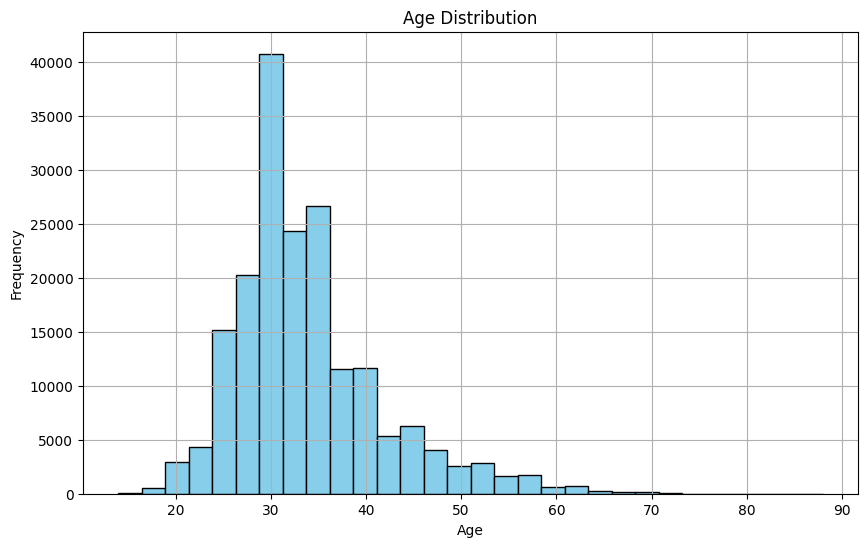

In [386]:
#age 열 표 출력
plt.figure(figsize=(10, 6))
plt.hist(df[df['age'] != 0]['age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

body type 정보 출력

In [387]:
df['body type'].value_counts()

body type
hourglass            52246
athletic             43264
petite               22055
pear                 20876
straight & narrow    14648
full bust            13411
apple                 4011
Name: count, dtype: int64

In [388]:
df['body type'].isnull().sum()

14023

weight 컬럼을 이용하여 body type 결측치 처리, knn사용


In [389]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# 1. 훈련용 데이터 (결측 없는)
train_data = df.dropna(subset=['body type', 'weight']).copy()
X_train = train_data[['weight']]
y_train = train_data['body type']

# 2. 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# 3. KNN 훈련
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# 남은 결측값 반복해서 처리
while True:
    target_data = df[df['body type'].isnull() & df['weight'].notnull()]
    if len(target_data) == 0:
        break

    n_sample = min(10000, len(target_data))
    target_sample = target_data.sample(n=n_sample, random_state=42)

    X_target_sample = target_sample[['weight']]
    X_target_scaled = scaler.transform(X_target_sample)
    predicted_bodytypes = knn.predict(X_target_scaled)

    df.loc[target_sample.index, 'body type'] = predicted_bodytypes

print("최종 남은 body type 결측값 수:", df['body type'].isnull().sum())

최종 남은 body type 결측값 수: 0


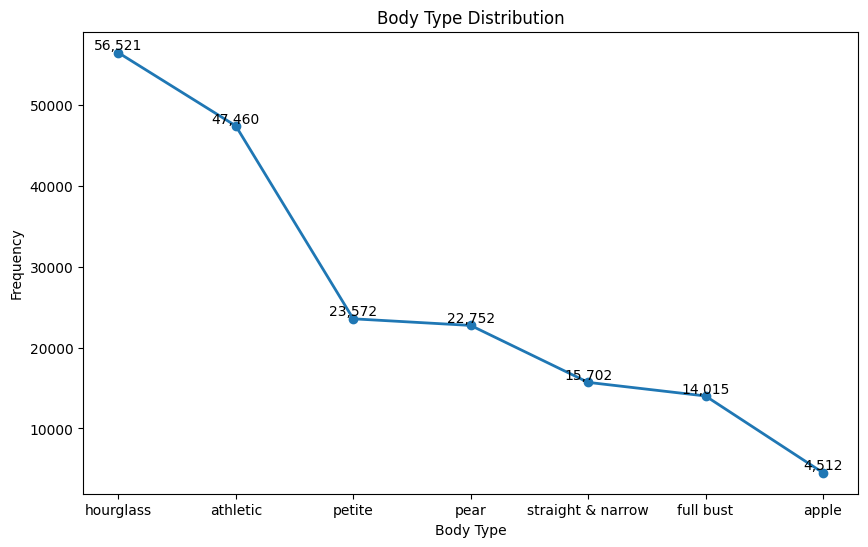

In [390]:
plt.figure(figsize=(10, 6))

body_type_counts = df['body type'].value_counts()

plt.plot(body_type_counts.index, body_type_counts.values, marker='o', linewidth=2)
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')

for x, y in zip(body_type_counts.index, body_type_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

In [391]:
body_type_one_hot = pd.get_dummies(df['body type'], prefix='body_type')
df = pd.concat([df, body_type_one_hot], axis=1)
df = df.drop('body type', axis=1)

# One-hot 인코딩된 컬럼들의 합계 확인
print(df.filter(like='body_type_').sum())

body_type_apple                 4512
body_type_athletic             47460
body_type_full bust            14015
body_type_hourglass            56521
body_type_pear                 22752
body_type_petite               23572
body_type_straight & narrow    15702
dtype: int64


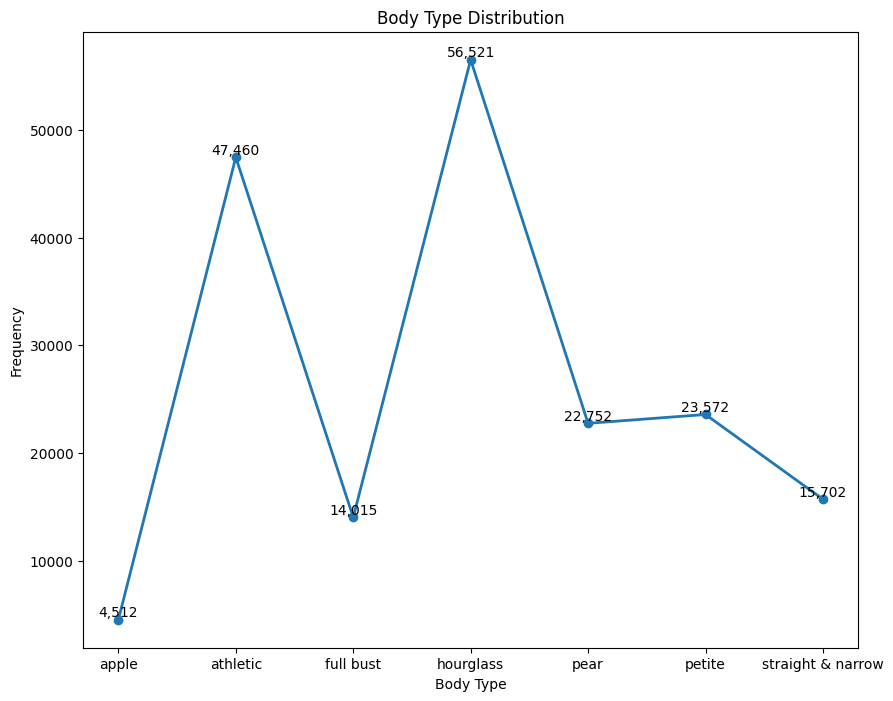

In [392]:
body_type_columns = ['body_type_apple', 'body_type_athletic', 'body_type_full bust', 'body_type_hourglass', 'body_type_pear', 'body_type_petite', 'body_type_straight & narrow']

# 2. 각 카테고리별 합계를 구함 (value_counts와 같은 역할)
body_type_counts = df[body_type_columns].sum()

# 3. 시각화
plt.figure(figsize=(10, 8))

plt.plot(body_type_counts.index.str.replace('body_type_', ''), body_type_counts.values, marker='o', linewidth=2)
plt.title('Body Type Distribution')
plt.xlabel('Body Type')
plt.ylabel('Frequency')

for x, y in zip(body_type_counts.index.str.replace('body_type_', ''), body_type_counts.values):
    plt.text(x, y, f'{int(y):,}', ha='center', va='bottom')

plt.show()

K-means 모델 사용

In [393]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# 1. 컬럼 구분
num_cols = ['weight', 'height', 'age', 'size']
cat_cols = ['fit_fit', 'fit_small', 'fit_large',
            'body_type_apple', 'body_type_athletic', 'body_type_full bust',
            'body_type_hourglass', 'body_type_pear', 'body_type_petite',
            'body_type_straight & narrow']

selected_columns = num_cols + cat_cols

# 2. 결측치 제거 + 샘플링
df_cluster = df[selected_columns].dropna().sample(n=100000, random_state=42)

# 3. 수치형만 스케일링
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(df_cluster[num_cols])

# 4. 범주형은 그대로 사용
X_cat = df_cluster[cat_cols].values

# 5. 둘을 합치기
X_combined = np.concatenate([X_num_scaled, X_cat], axis=1)

# PCA (retain 95% variance)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_combined)

# 7. KMeans 클러스터링
k = 20
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)

# 8. Silhouette Score 출력
score = silhouette_score(X_pca, kmeans.labels_)
print(f" Silhouette Score : {score:.4f}")

 Silhouette Score : 0.1386


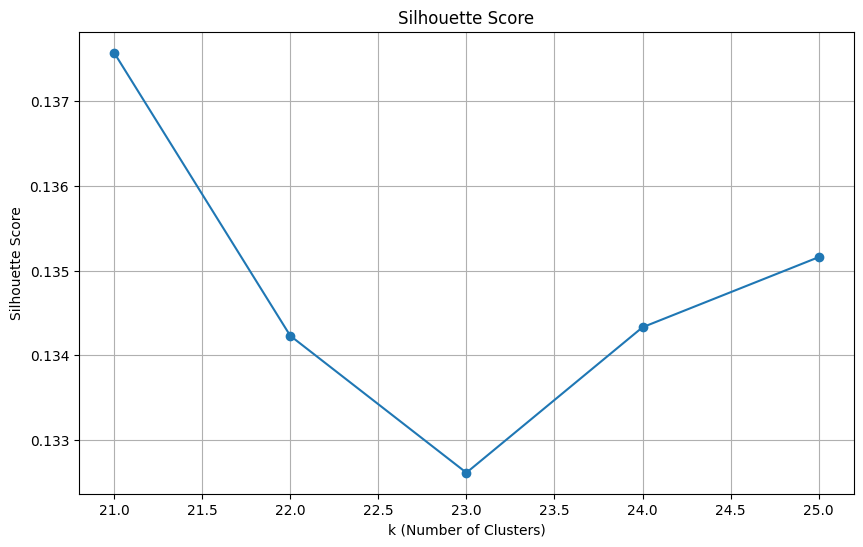

In [394]:
# PCA가 적용된 데이터에서 k에 따른 Silhouette Score 비교
import matplotlib.pyplot as plt

k_range = range(21, 26)
silhouette_scores = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)  
    score = silhouette_score(X_pca, kmeans.labels_)
    silhouette_scores.append(score)

# 그래프 시각화
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o')
plt.title('Silhouette Score')
plt.xlabel('k (Number of Clusters)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


In [395]:
# from sklearn.cluster import KMeans
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA
# import pandas as pd

# # 1. 사용할 컬럼 선택, rating_5 제거
# selected_columns = [
#     'fit_fit', 'fit_small', 'fit_large', 'bmi', 'size', 'age',
#     'body_type_apple', 'body_type_athletic', 'body_type_full bust',
#     'body_type_hourglass', 'body_type_pear', 'body_type_petite',
#     'body_type_straight & narrow'
# ]

# # 2. 결측치 제거 + 샘플링
# df_cluster = df[selected_columns].dropna().sample(n=100000, random_state=42)

# # 3. 표준화
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(df_cluster)

# # 4. PCA 적용 (전체 분산의 95% 이상 유지, 차원축소소)
# pca = PCA(n_components=0.95)
# X_pca = pca.fit_transform(X_scaled)

# # 5. KMeans 클러스터링 k=24 , 0.4612
# k = 24
# kmeans = KMeans(n_clusters=k, random_state=42)
# kmeans.fit(X_pca)

# # 6. Silhouette Score 출력
# score = silhouette_score(X_pca, kmeans.labels_)
# print(f" Silhouette Score (PCA 적용 후): {score:.4f}")
# print(f" 축소된 후 차원 수: {X_pca.shape[1]}") #남은 차원의 개수
